Hola Fernando!

Mi nombre es Miguel Gutierrez y revisare tu proyecto ! Para darte un contexto, trabajo como cientifico de datos en Mercado Libre. Asi que seras revisado por alguien que aplica a diario todo este tipo de tecnicas en su vida laboral ! Espero una vez finalizes este bootcamp, tambien lo apliques ! Buena suerte !

Cuando vea un error la primera vez, lo señalare. Dejare que encuentres la solucion. Tambien en el texto hare algunas observaciones de como podrias mejorar el codio y tambien hare comentarios de tus percepciones sobre el tema. Si no pueds manejar la tarea, te dare una pista precisa en la siguiente iteraciones y algunos ejemplos practicos. Estare abierto a cualquierda duda y discusion respecto al tema. En general los comentarios de advertencia tu decides si tomarlos o no. No es necesario que acates todos los cambios de advertencia.

Encontraras mis comentarios en el siguiente formato - *Por favor no mueves, modifiques o elimines los comentarios*.

Podras encontrar mis comentarios en verde, amarillo o rojo como estos:


<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Excelente. Todo esta perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Comentarios. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Necesita ser arreglado. El bloque requiere algunas correciones. El trabajo no podra ser acceptado si tiene comentarios en rojo.
</div>

Puedes responderme utilizando este tipo de comentario:

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>
</div>

# Descripcipción del proyecto

Film Junky Union, una nueva comunidad vanguardista para los aficionados de las películas clásicas, está desarrollando un sistema para filtrar y categorizar reseñas de películas. Tu objetivo es entrenar un modelo para detectar las críticas negativas de forma automática. Para lograrlo, utilizarás un conjunto de datos de reseñas de películas de IMDB con leyendas de polaridad para construir un modelo para clasificar las reseñas positivas y negativas. Este deberá alcanzar un valor F1 de al menos 0.85.

## Inicialización

In [236]:
import numpy as np
import pandas as pd
import seaborn as sns

import random             
import spacy
import re
import torch
import transformers
import math
import string
import nltk

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from tqdm.auto import tqdm

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.dummy import DummyClassifier

from gensim.models import Word2Vec
from lightgbm import LGBMClassifier

from nltk.corpus import stopwords as nltk_stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.wordnet import WordNetLemmatizer


In [237]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
plt.style.use('seaborn')

## Cargar datos

In [238]:
df_reviews = pd.read_csv('/datasets/imdb_reviews.tsv', sep='\t', dtype={'votes': 'Int64'})

In [239]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47331 entries, 0 to 47330
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           47331 non-null  object 
 1   title_type       47331 non-null  object 
 2   primary_title    47331 non-null  object 
 3   original_title   47331 non-null  object 
 4   start_year       47331 non-null  int64  
 5   end_year         47331 non-null  object 
 6   runtime_minutes  47331 non-null  object 
 7   is_adult         47331 non-null  int64  
 8   genres           47331 non-null  object 
 9   average_rating   47329 non-null  float64
 10  votes            47329 non-null  Int64  
 11  review           47331 non-null  object 
 12  rating           47331 non-null  int64  
 13  sp               47331 non-null  object 
 14  pos              47331 non-null  int64  
 15  ds_part          47331 non-null  object 
 16  idx              47331 non-null  int64  
dtypes: Int64(1),

In [240]:
df_reviews.head()

tconst title_type primary_title original_title  start_year end_year  \
0  tt0068152      movie             $              $        1971       \N   
1  tt0068152      movie             $              $        1971       \N   
2  tt0313150      short          '15'           '15'        2002       \N   
3  tt0313150      short          '15'           '15'        2002       \N   
4  tt0313150      short          '15'           '15'        2002       \N   

  runtime_minutes  is_adult              genres  average_rating  votes  \
0             121         0  Comedy,Crime,Drama             6.3   2218   
1             121         0  Comedy,Crime,Drama             6.3   2218   
2              25         0  Comedy,Drama,Short             6.3    184   
3              25         0  Comedy,Drama,Short             6.3    184   
4              25         0  Comedy,Drama,Short             6.3    184   

                                              review  rating   sp  pos  \
0  The pakage implies that Warren Beatty and Gold...       1  neg    0   
1  How the hell did they get this made?! Presenti...       1  neg    0   
2  There is no real story the film seems more lik...       3  neg    0   
3  Um .... a serious film about troubled teens in...       7  pos    1   
4  I'm totally agree with GarryJohal from Singapo...       9  pos    1   

  ds_part   idx  
0   train  8335  
1   train  8336  
2    test  2489  
3    test  9280  
4    test  9281

In [241]:
df_reviews.isna().sum()

tconst             0
title_type         0
primary_title      0
original_title     0
start_year         0
end_year           0
runtime_minutes    0
is_adult           0
genres             0
average_rating     2
votes              2
review             0
rating             0
sp                 0
pos                0
ds_part            0
idx                0
dtype: int64

In [242]:
df_reviews.duplicated().value_counts()

False    47331
dtype: int64

In [243]:
df_reviews = df_reviews.dropna().reset_index(drop=True)

Al final de la carga de datos hemos verificado que no existan líneas duplicadas y que no eistan valores ausentes para poder realizar un posterior análisis de los datos representativo y separar los datos en sus conjuntos de entrenamiento y prueba.

## EDA

### Número de películas a lo largo de los años

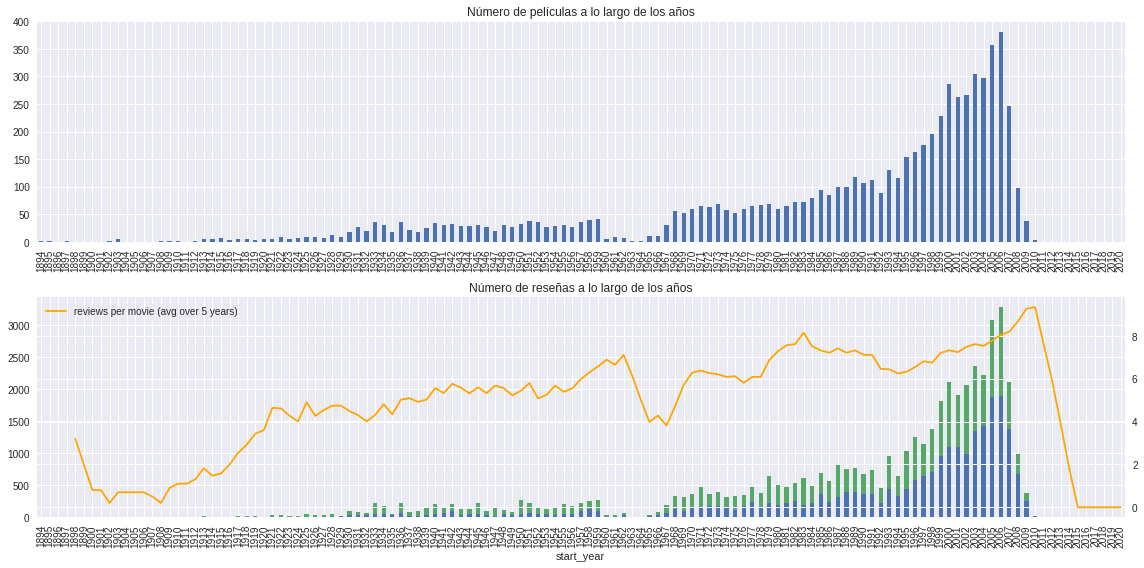

In [244]:
fig, axs = plt.subplots(2, 1, figsize=(16, 8))

ax = axs[0]

dft1 = df_reviews[['tconst', 'start_year']].drop_duplicates() \
    ['start_year'].value_counts().sort_index()
dft1 = dft1.reindex(index=np.arange(dft1.index.min(), max(dft1.index.max(), 2021))).fillna(0)
dft1.plot(kind='bar', ax=ax)
ax.set_title('Número de películas a lo largo de los años')

ax = axs[1]

dft2 = df_reviews.groupby(['start_year', 'pos'])['pos'].count().unstack()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)

dft2.plot(kind='bar', stacked=True, label='#reviews (neg, pos)', ax=ax)

dft2 = df_reviews['start_year'].value_counts().sort_index()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)
dft3 = (dft2/dft1).fillna(0)
axt = ax.twinx()
dft3.reset_index(drop=True).rolling(5).mean().plot(color='orange', label='reviews per movie (avg over 5 years)', ax=axt)

lines, labels = axt.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

ax.set_title('Número de reseñas a lo largo de los años')

fig.tight_layout()

El número de reseñas aumenta en paralelo con el aumento de películas en cada año hasta llegar a un máximo en 2007, el promedio de reseñas por año es más o menos constante entre 1920 y 1960, y posteriormente se ve una tendencia a la alza desde 1970 hasta 2010.

### Calificación promedio de las películas

array([[<AxesSubplot:title={'center':'average_rating'}>]], dtype=object)

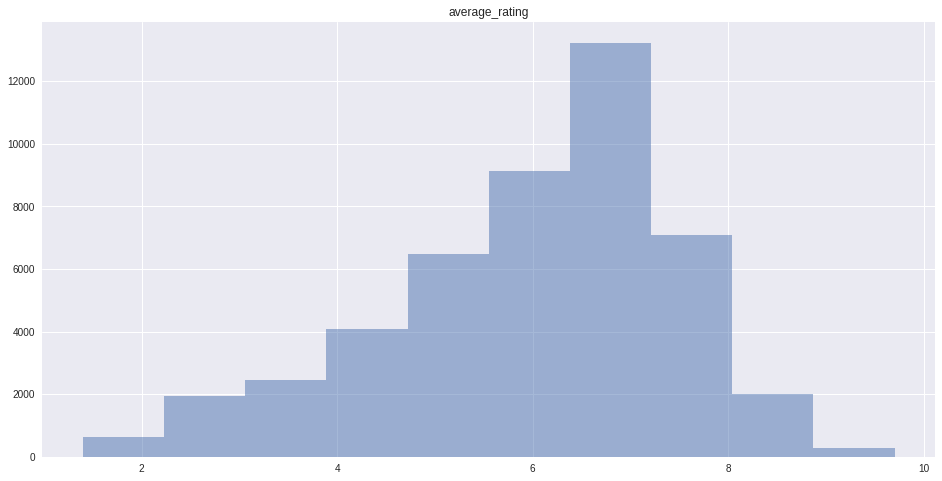

In [245]:
df_reviews.hist(column='average_rating', alpha=0.5, figsize = (16,8))

En la escala del 1 al 10, la distribución de calificaciones para todas las películas de todos los géneros se centra entre 6 y 8.

### Géneros más calificados

<AxesSubplot:title={'center':'Principales géneros calificados'}, xlabel='genres'>

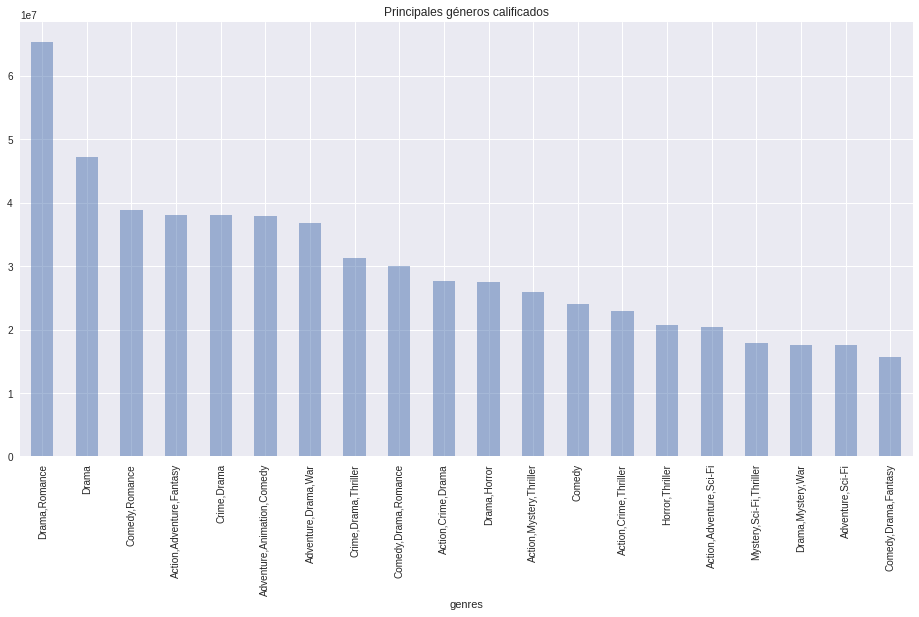

In [246]:
df_reviews.groupby('genres')['votes'].sum().sort_values(ascending=False)[:20].plot(kind='bar', alpha=0.5, title = 'Principales géneros calificados', figsize = (16,8))

Los 5 principales géneros calificados de todos los tiempos están liderados por drama/romance, drama, comedia/romance, acción y crimen.

### Distribución de reseñas negativas y positivas a lo largo de los años

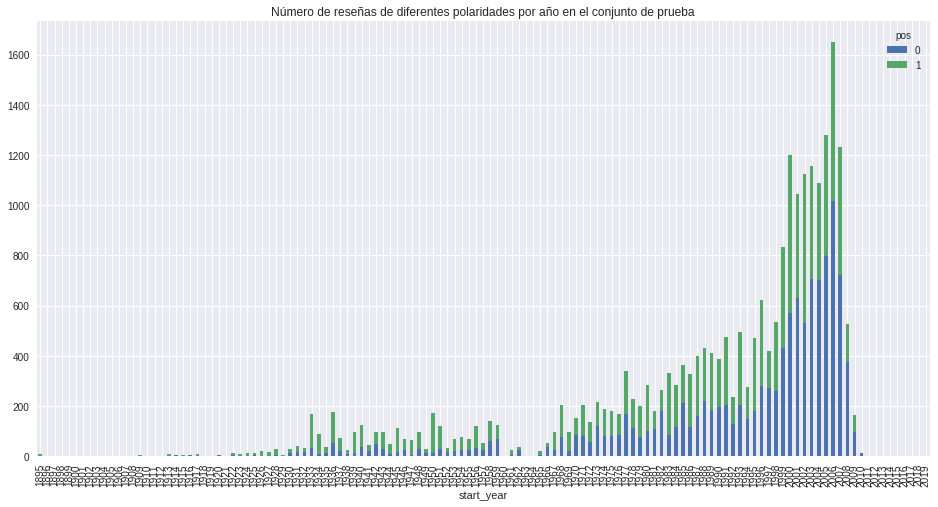

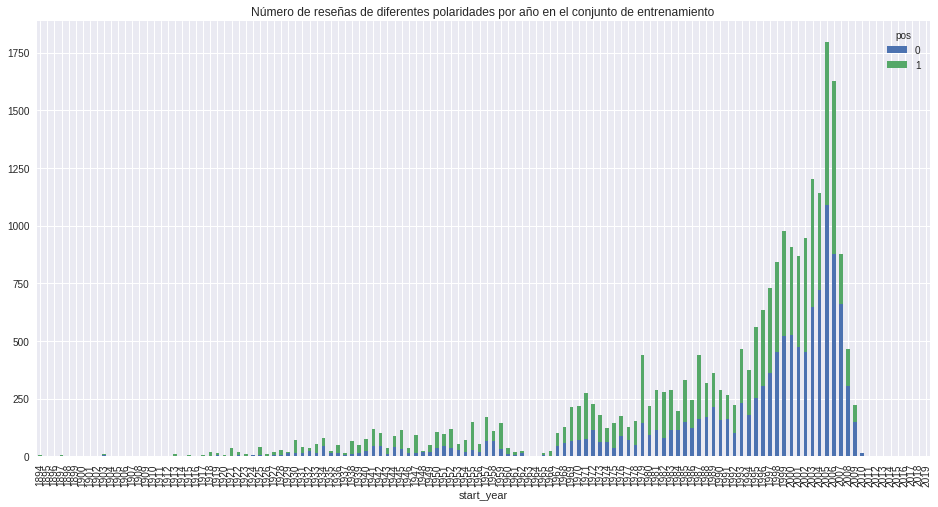

In [247]:
dft = df_reviews.query('ds_part == "train"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, figsize=(16, 8))
plt.title('Número de reseñas de diferentes polaridades por año en el conjunto de prueba')

dft = df_reviews.query('ds_part == "test"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, figsize=(16, 8))
plt.title('Número de reseñas de diferentes polaridades por año en el conjunto de entrenamiento')

plt.show()

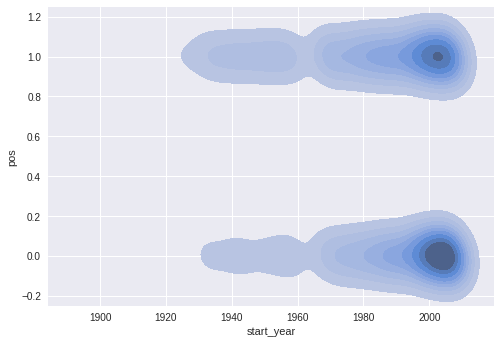

In [248]:
sns.kdeplot(data=df_reviews, x="start_year", y="pos", shade=True)
plt.show()

<div class="alert alert-block alert-warning">
<b>Comentario revisor V2</b> <a class="tocSkip"></a>

Para este grafico te recomiendo haste un kde plot, un plot de la distribucion de los datos

</div>

<div class="alert alert-block alert-warning">
<b>Comentario revisor V3</b> <a class="tocSkip"></a>

De este tipo me referia, perdon por asumir que lo harias asi, lo dejo en warning por que no es necesario, pero sera importante que lo tengas bien para tu portafolio. 
</div>

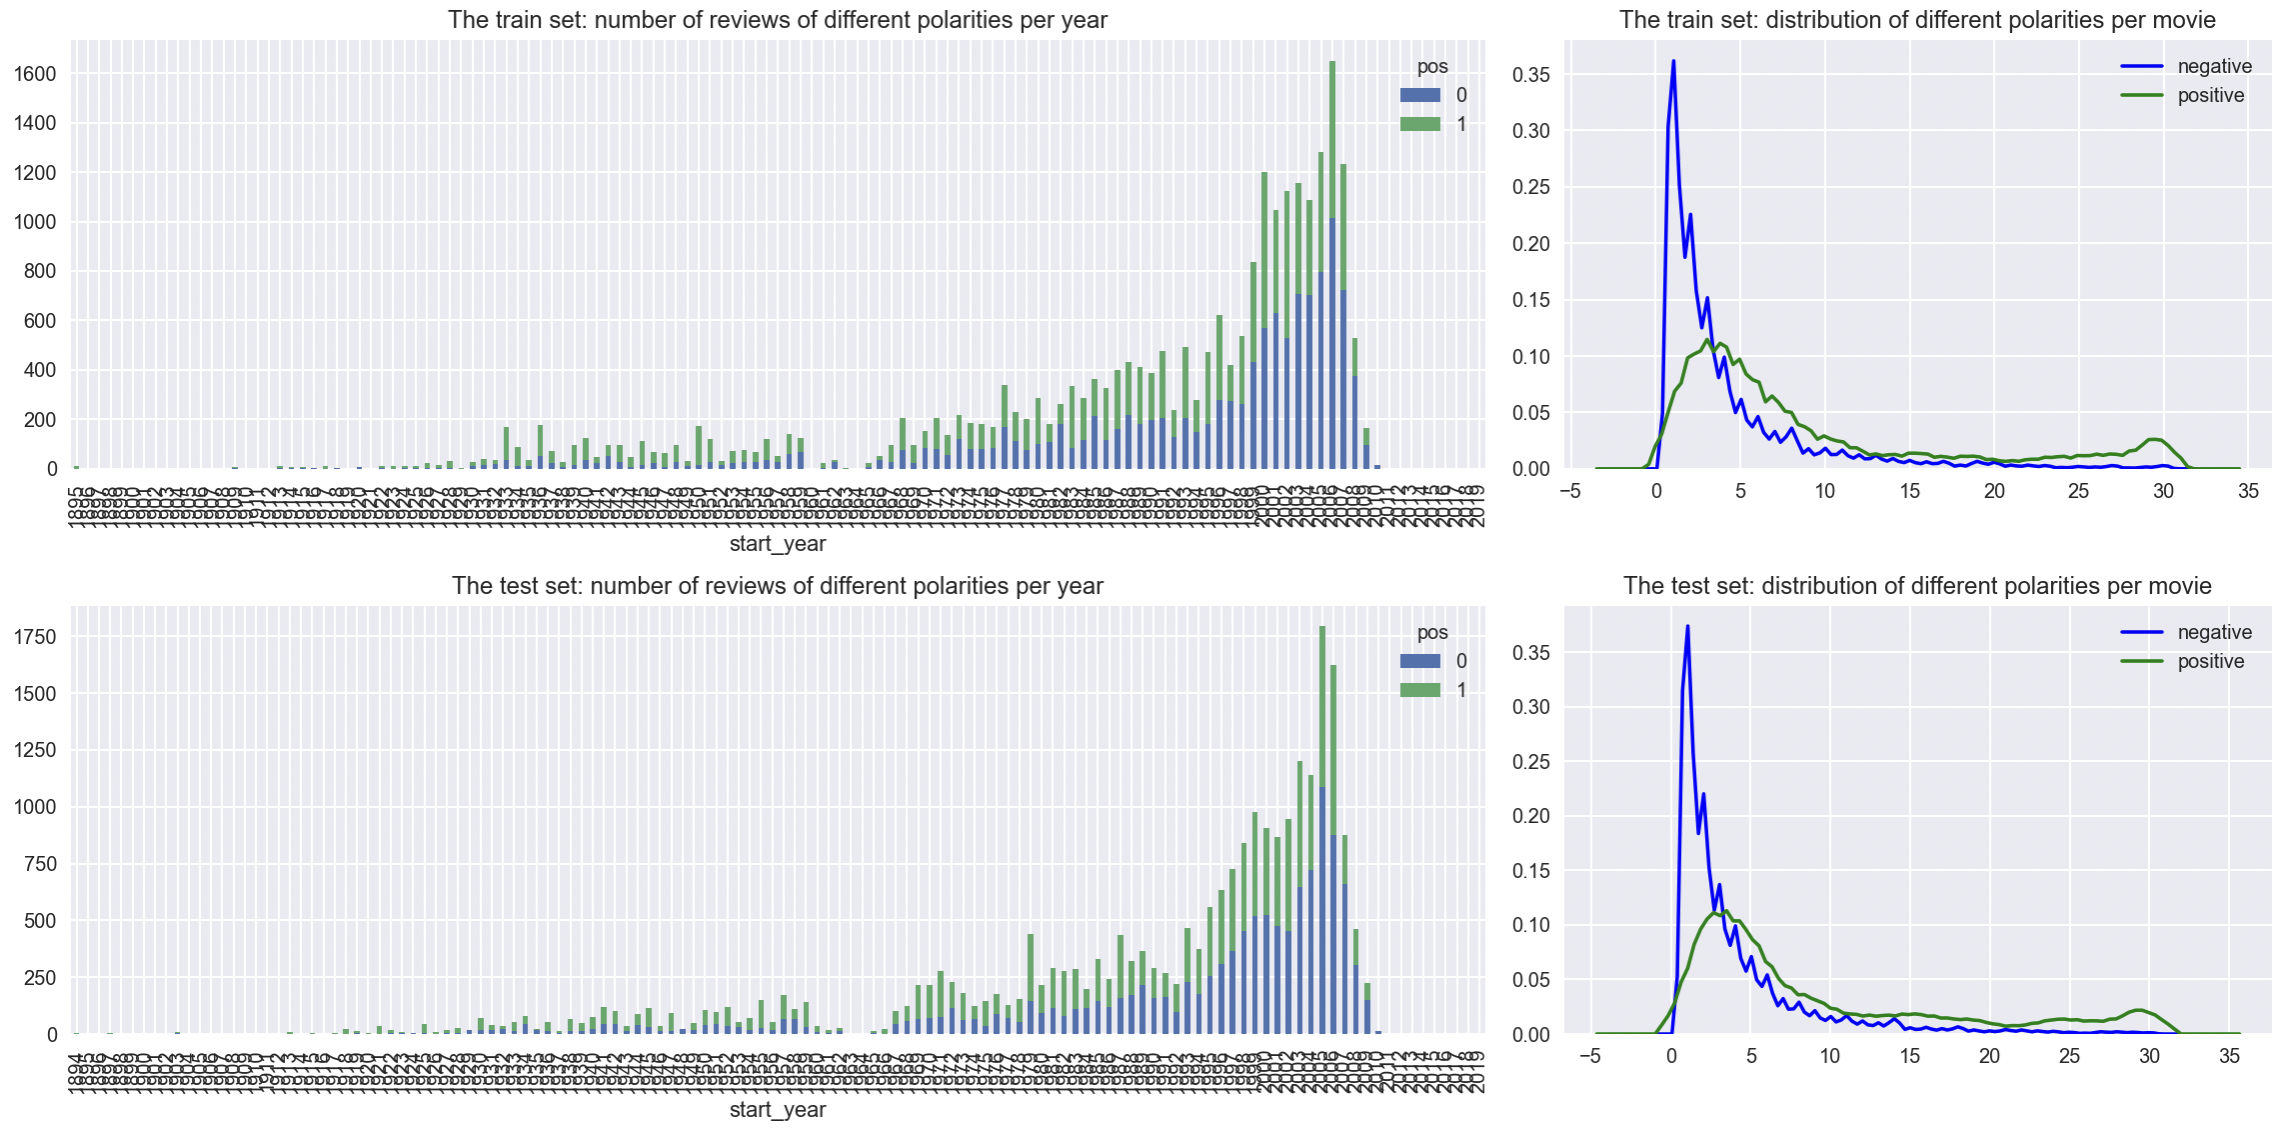

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> 
Listo con un gráfico KDE que muestra de mejor manera la distribución de positivo y negativo a lo largo de los años. Gracias!!
 <a class="tocSkip"></a>
</div>

Se puede observar en ambos conjuntos de datos, que las calificaciones positivas y negativas están divididas año tras año. En realidad no es claro si una predomina sobre la otra, sin embargo, el último gráfico apoya la afirmación al mostrar una distribución muy similar en la totalidad de reseñas positivs y negativas en cada año al mismo tiempo que muestra una mayor cantidad de películas calificadas hacia el 2007.

<div class="alert alert-block alert-danger">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Agrega conclusiones intermedias **HECHO** </div>

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> 
Listo con comentarios sobre conclusiones en cada gráfico.
 <a class="tocSkip"></a>
</div>

## Normalización

Suponemos que todos los modelos a continuación aceptan textos en minúsculas y sin dígitos, signos de puntuación, etc.

In [249]:
def clear_text(text):
    clean_text = re.sub(r'[^a-zA-z\']', ' ', text)
    clean_text = " ".join(clean_text.split())
    return clean_text

In [250]:
review_norm=[]
for line in df_reviews['review']:
    clean_text = clear_text(line)
    review_norm.append(clean_text)

In [251]:
df_reviews['review_norm'] = pd.DataFrame(review_norm)

<div class="alert alert-block alert-success">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Un paso importante ! 
</div>

Al finalizar esta sección, hemos eliminado todos los caracteres excepto las letras, los apóstrofos y los espacios por medio de una expresión regular para encontrarlos.

## División entrenamiento / prueba

El conjunto de datos ya está dividido en partes de entrenamiento/prueba; 'ds_part' es el indicador correspondiente.

In [252]:
df_reviews_train = df_reviews.query('ds_part == "train"').copy()
df_reviews_test = df_reviews.query('ds_part == "test"').copy()

Y_train = df_reviews_train['pos']
Y_test = df_reviews_test['pos']

print(Y_train.shape)
print(Y_test.shape)

(23796,)
(23533,)


In [253]:
X_train = df_reviews_train['review_norm']
X_test = df_reviews_test['review_norm']

print(X_train.shape)
print(X_test.shape)

(23796,)
(23533,)


## Trabajar con modelos

### Rutina de evaluación de modelos

In [254]:
import sklearn.metrics as metrics
def evaluate_model(model, train_features, train_target, test_features, test_target):
    
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 
    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # Valor F1
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        
        # establecer cruces para algunos umbrales        
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'Valor F1') 

        # ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        
        # establecer cruces para algunos umbrales        
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title(f'Curva ROC')
        
        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        
        # establecer cruces para algunos umbrales        
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')        

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)
    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Exactitud', 'F1', 'APS', 'ROC AUC'))
    
    print(df_eval_stats)
    
    return

### Rutinas de preprocesamiento y vectorización de textos

A continuación crearemos las funciones para el preprocesamiento y la vectorización de texto por medio de Word2vec.

In [255]:
pip install --upgrade gensim

  Using cached gensim-4.3.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.6 MB)
  Attempting uninstall: gensim
    Found existing installation: gensim 4.1.2
    Uninstalling gensim-4.1.2:
ERROR: Could not install packages due to an OSError: [Errno 13] Permission denied: 'COPYING'
Consider using the `--user` option or check the permissions.

Note: you may need to restart the kernel to use updated packages.


In [256]:
#pip install scikit-learn gensim nltk 

In [257]:
stop_words=set(stopwords.words('english'))

In [258]:
def preprocess(text):
    text = text.lower()
    text = ''.join([word for word in text if word not in string.punctuation])
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [259]:
def vectorize(sentence):
    words = sentence.split()
    words_vecs = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
    if len(words_vecs) == 0:
        return np.zeros(100)
    words_vecs = np.array(words_vecs)
    return words_vecs.mean(axis=0)

### Modelo de clasificación Dummy

In [260]:
X_train = X_train.apply(preprocess)
X_test = X_test.apply(preprocess)

In [261]:
sentences = [sentence.split() for sentence in X_train]
w2v_model = Word2Vec(sentences=sentences, window=5, min_count=5, workers=4)

In [262]:
sentences

[['pakage',
  'implies',
  'warren',
  'beatty',
  'goldie',
  'hawn',
  'pulling',
  'huge',
  'bank',
  'robbery',
  'thats',
  'got',
  'didnt',
  'get',
  'anything',
  'first',
  'half',
  'theres',
  'new',
  'character',
  'without',
  'introduction',
  'every',
  'scene',
  'first',
  'half',
  'hour',
  'completely',
  'incomprehensible',
  'rest',
  'one',
  'long',
  'annoying',
  'underlit',
  'chase',
  'scene',
  'theres',
  'always',
  'irritating',
  'sound',
  'background',
  'whether',
  'loud',
  'watch',
  'ticking',
  'blaring',
  'siren',
  'train',
  'whistling',
  'even',
  'horrible',
  'score',
  'quincy',
  'jones',
  'lot',
  'parts',
  'laughably',
  'bad',
  'like',
  'bad',
  'guys',
  'chasing',
  'beatty',
  'thin',
  'ice',
  'car',
  'police',
  'arriving',
  'scene',
  'roughly',
  'fifteen',
  'times',
  'really',
  'hated',
  'movie'],
 ['hell',
  'get',
  'made',
  'presenting',
  'caper',
  'comedy',
  'misbegotten',
  'essentially',
  'two',
  '

In [263]:
X_train = np.array([vectorize(sentence) for sentence in X_train])
X_test = np.array([vectorize(sentence) for sentence in X_test])

In [264]:
X_train

array([[-0.15596065,  0.50567055, -0.04191626, ..., -0.34519175,
        -0.23779657,  0.26155752],
       [-0.01569939,  0.2627166 ,  0.0064083 , ..., -0.20265275,
        -0.35403922, -0.05449239],
       [-0.10761794,  0.6098304 ,  0.09056491, ..., -0.12194447,
        -0.5077968 , -0.02771789],
       ...,
       [-0.05200149,  0.5778977 ,  0.02024345, ..., -0.24552892,
        -0.19724219, -0.02415561],
       [-0.01985535,  0.50985354,  0.0200647 , ..., -0.1970604 ,
        -0.35328624,  0.04979031],
       [-0.01042172,  0.46833944, -0.04634675, ..., -0.1963742 ,
        -0.4145148 , -0.04492823]], dtype=float32)

In [265]:
model_1 = DummyClassifier()
model_1.fit(X_train, Y_train)
Y_pred = model_1.predict(X_train)
print('Exactitud con el conjunto de entrenamiento:', metrics.accuracy_score(Y_train, Y_pred))

Exactitud con el conjunto de entrenamiento: 0.5005883341738108


           train  test
Exactitud    NaN   NaN
F1           0.0   0.0
APS          0.5   0.5
ROC AUC      0.5   0.5


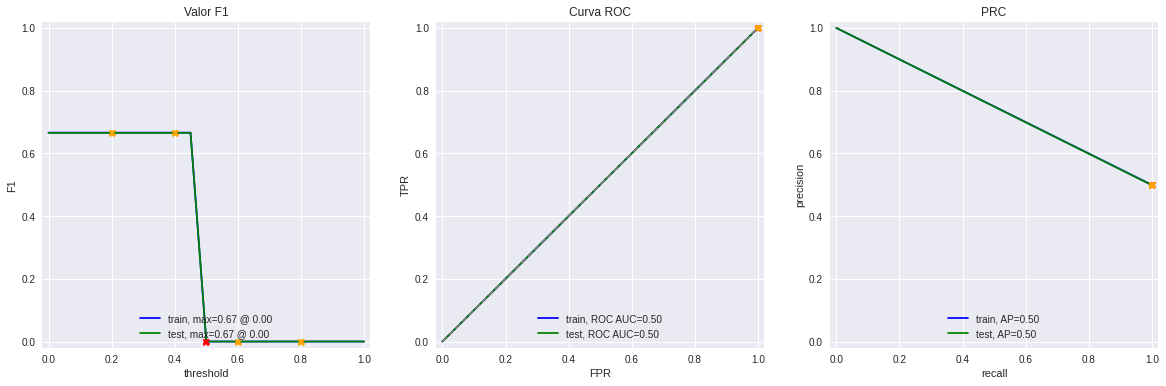

In [266]:
evaluate_model(model_1, X_train, Y_train, X_test, Y_test)

<div class="alert alert-block alert-danger">

<b>Comentario revisor</b> <a class="tocSkip"></a>

La idea es mostrar la siguiente imagen, es mucho de lso diferentes componentes predictivos del modelo **HECHO**</div>

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> 
Listo con la rutina de evaluación predeterminada en el proyecto.
 <a class="tocSkip"></a>
</div>

### Modelo de clasificación con regresión logística

In [267]:
model_2 = LogisticRegression(random_state=12345)
model_2.fit(X_train, Y_train)
Y_pred_2 = model_2.predict(X_train)
print('Exactitud con el conjunto de entrenamiento:', metrics.accuracy_score(Y_train, Y_pred_2))

Exactitud con el conjunto de entrenamiento: 0.8503950243738443


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


           train  test
Exactitud    NaN   NaN
F1          0.85  0.85
APS         0.92  0.92
ROC AUC     0.92  0.92


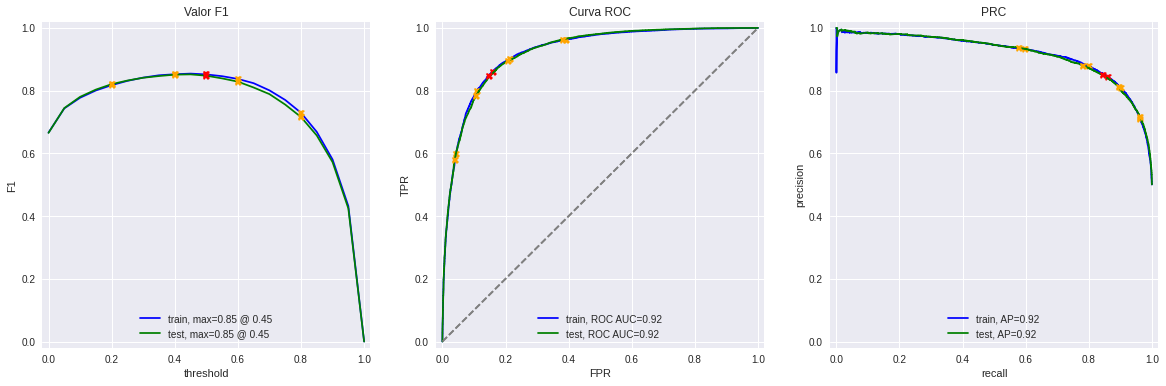

In [268]:
evaluate_model(model_2, X_train, Y_train, X_test, Y_test)

### Modelo de potenciación de gradiente LGBMClassifier

In [269]:
model_3 = LGBMClassifier(max_depth=100, n_estimators=500) 
model_3.fit(X_train, Y_train)
Y_pred_3 = model_3.predict(X_train)
print('Exactitud con el conjunto de entrenamiento:', metrics.accuracy_score(Y_train, Y_pred_3))

Exactitud con el conjunto de entrenamiento: 0.9979828542612204


           train  test
Exactitud    NaN   NaN
F1           1.0  0.84
APS          1.0  0.92
ROC AUC      1.0  0.92


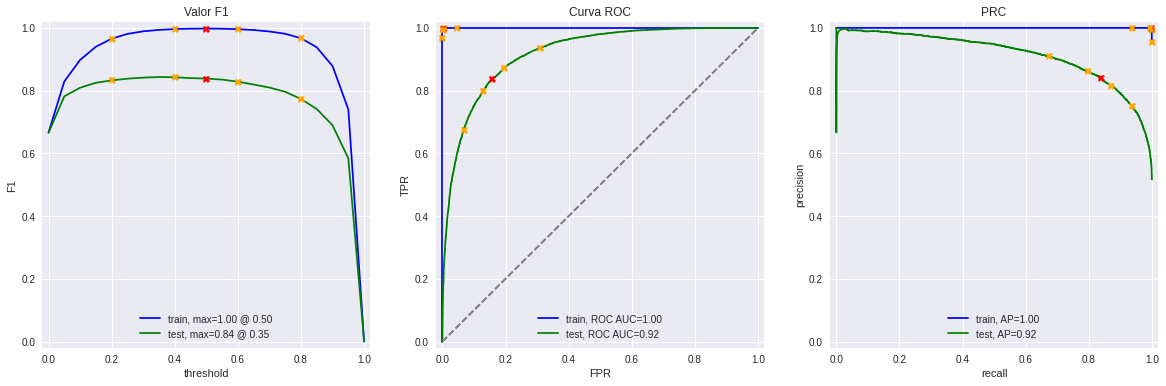

In [270]:
evaluate_model(model_3, X_train, Y_train, X_test, Y_test)

Podemos observar que el modelo Dummy tiene un puntaje F1 = 0, lo que quiere decir que éste modelo no es capaz de clasificar verdaderos positivos. En el caso del modelo de regresión logística, esto mejora radicalmente hasta 0,85 y el mejor modelo es el de potenciación de gradiente, en donde observamos un puntaje F1 = 1, lo que quiere decir que éste modelo no produce falsos negativos o falsos positivos.

### Verificación de modelos con datos de prueba

In [271]:
model_test_1 = LogisticRegression(random_state=12345)
model_test_1.fit(X_train, Y_train)
Y_pred_test_1 = model_test_1.predict(X_test)
print('F1_score con el conjunto de prueba:', round(metrics.f1_score(Y_test, Y_pred_test_1),2))

F1_score con el conjunto de prueba: 0.85


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [272]:
model_test = LGBMClassifier(max_depth=500, n_estimators=1000) 
model_test.fit(X_train, Y_train)
Y_pred_test = model_test.predict((X_test))
print('F1_score con el conjunto de prueba:', round(metrics.f1_score(Y_test, Y_pred_test),2))

F1_score con el conjunto de prueba: 0.84


En ambos modelos, utilizando el conjunto de prueba para la predicción obtenemos un puntaje F1 máximo igual a 0,84 lo que significa que los verdaderos positivos representan el 84% de la población respecto a los falsos negativos y falsos positivos.

## Mis reseñas

In [290]:
my_reviews = pd.DataFrame([
    'I did not simply like it, not my kind of movie.',
    'Well, I was bored and felt asleep in the middle of the movie.',
    'I was really fascinated with the movie',    
    'Even the actors looked really old and disinterested, and they got paid to be in the movie. What a soulless cash grab.',
    'I didn\'t expect the reboot to be so good! Writers really cared about the source material',
    'The movie had its upsides and downsides, but I feel like overall it\'s a decent flick. I could see myself going to see it again.',
    'What a rotten attempt at a comedy. Not a single joke lands, everyone acts annoying and loud, even kids won\'t like this!',
    'Launching on Netflix was a brave move & I really appreciate being able to binge on episode after episode, of this exciting intelligent new drama.'
], columns=['review'])

In [291]:
my_review=[]
for line in my_reviews['review']:
    my_review.append(clear_text(line))

In [292]:
my_reviews['review_norm'] = pd.DataFrame(my_review)

In [293]:
my_reviews['review_norm']

0        I did not simply like it not my kind of movie
1    Well I was bored and felt asleep in the middle...
2               I was really fascinated with the movie
3    Even the actors looked really old and disinter...
4    I didn't expect the reboot to be so good Write...
5    The movie had its upsides and downsides but I ...
6    What a rotten attempt at a comedy Not a single...
7    Launching on Netflix was a brave move I really...
Name: review_norm, dtype: object

In [294]:
texts = my_reviews['review_norm']
texts_w2v_prep = texts.apply(preprocess)

In [295]:
#sentences_test = [sentence.split() for sentence in texts_w2v_prep]
#w2v_model = Word2Vec(sentences_test, window=5, min_count=5, workers=4)

In [306]:
texts_w2v_prep

0                               simply like kind movie
1                  well bored felt asleep middle movie
2                              really fascinated movie
3    even actors looked really old disinterested go...
4    didnt expect reboot good writers really cared ...
5    movie upsides downsides feel like overall dece...
6    rotten attempt comedy single joke lands everyo...
7    launching netflix brave move really appreciate...
Name: review_norm, dtype: object

In [296]:
texts_w2v_final = np.array([vectorize(sentence) for sentence in texts_w2v_prep])

### Modelo 1 - dummy

In [297]:
model_pred_1 = model_1.predict(texts_w2v_final)
pred_proba_1 = model_1.predict_proba(texts_w2v_final)

In [298]:
pred_proba_1_df = pd.DataFrame(data = pred_proba_1, 
                        columns = ["Class_0",
                                   "Class_1"])

In [299]:
pred_proba_1_df

Class_0   Class_1
0  0.500588  0.499412
1  0.500588  0.499412
2  0.500588  0.499412
3  0.500588  0.499412
4  0.500588  0.499412
5  0.500588  0.499412
6  0.500588  0.499412
7  0.500588  0.499412

### Modelo 2 - regresión logística

In [300]:
model_pred_2 = model_2.predict(texts_w2v_final)
pred_proba_2 = model_2.predict_proba(texts_w2v_final)

In [301]:
pred_proba_2_df = pd.DataFrame(data = pred_proba_2, 
                        columns = ["Class_0",
                                   "Class_1"])

In [302]:
pred_proba_2_df

Class_0   Class_1
0  0.994032  0.005968
1  0.873451  0.126549
2  0.130499  0.869501
3  0.998493  0.001507
4  0.915846  0.084154
5  0.955269  0.044731
6  0.999772  0.000228
7  0.007479  0.992521

### Modelo 3 - potenciación de gradiente

In [303]:
model_pred_3 = model_3.predict(texts_w2v_final)
pred_proba_3 = model_3.predict_proba(texts_w2v_final)

In [304]:
pred_proba_3_df = pd.DataFrame(data = pred_proba_3, 
                        columns = ["Class_0",
                                   "Class_1"])

In [305]:
pred_proba_3_df

Class_0   Class_1
0  0.026524  0.973476
1  0.814214  0.185786
2  0.552157  0.447843
3  0.910846  0.089154
4  0.709988  0.290012
5  0.789744  0.210256
6  0.994036  0.005964
7  0.183553  0.816447

La primer columna de cada modelo bajo la función predict_proba muestra la probabilidad de que la clase sea negativa y la segunda clase muestra la probabilidad de que la clasea sea positiva.

Podemos observar que la probabilidad de clase para cada línea de texto difiere significativamente, siendo el modelo de regresión logística e que representa mejor el sentimiento de las entradas de texto, por ejemplo, la entrada 2 es una entrada con sentimiento positivo que el modelo de regresión logística otorga alta probabilidad de que la clase sea 1, o sea, clasificación positiva.

<div class="alert alert-block alert-danger">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Recuerda verificar la notacion del modelo junto con su texto. Me parece un poco raro que sea un 0 cerrado y no tal vez un 0.2 por ejemplo ya es que es un modelo de probabilidad de calificacion de sentimientos, chequealo ! </div>

<div class="alert alert-block alert-danger">

<b>Comentario revisor V2</b> <a class="tocSkip"></a>

Me parece un raro digamos para el texto 2, el puntaje sea 0.27, cuando deberia dar un numero grande cercano a 1,  cuando el F1 es tan bueno, podrias revisarlo a detenimiento ? Si no puedes lo devuelves y te doy mas pistas para solucionarlo juntos **HECHO**</div>

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> 
Listo con la predicción de probabilidad para cada modelo desplegando su resultado para cada línea.
 <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> 
He colocado la probabilidad de que la asignación de la calificación sea negativa y positiva para cada línea según la evaluación de cada modelo. En efecto, vemos que el modelo de regresión logística muestra la mayor probabilidad de calificar cada reseña con 0, a la par que su F1_score revela que su capacidad para discriminar positivos verdaderos es muy alta.
Sin embargo, no comprendo porque no pueden los modelos catalogar la línea 2 del texto como una reseña positiva. Alguna pista?
 <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-danger">

<b>Comentario revisor V3</b> <a class="tocSkip"></a>

Me parece por que puede que este afectando el Word2vec, pero incluso aun asi no me suena por que word2vec funciona. En generla este tipo de problemas esta relacion con la generacion de los tokens para el modelo. Prueba intentando utilizar `TfidfVectorizer` de `sklearn` que es lo que deberias utilizar y no word2vec. Parece que se esta maximizando el modelo la proporcion mas grande para clasificar correctamente, pero no lo esta haciendo bien. En caso contrario podrias revisarlo a detenimiento con un tutor. Esto son los casos donde la metrica te da bien, pero el modelo parece que no esta performando correctamente **HECHO** </div>

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> 
Finalmente encontré mi error, justo al preprocesar los textos para probar todos los modelos estaba llamando nuevamente a la función Word2Vec(sentences_test, window=5, min_count=5, workers=4) lo cual volvía a aprender del texto en cuestión y dificultaba el discernimiento de clase en los modelos probados posteriormente. Ya lo he resuelto, incluso he dejado la línea entre signos de ## para mostrar que eliminando esta línea los modelos ya pueden discernir las clases línea tras línea. Como referencia, la línea dos y la línea 7 de los textos tienen una probabilidad más alta de ser positiva en el modelo de regresión logística y en el de potenciación de gradiente que el resto de las líneas, me parece que esto tiene sentido. Gracias por la ayuda!!
 <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">

<b>Comentario revisor V4</b> <a class="tocSkip"></a>
Ahora si parece que esta bien ! Importante revisar casos especificos cuando trabajes, para darle double check que lo que estes haciendo el modelo te esta dando buenos resultados y tiene sentido ! Si quieres puedes agregarle el TFidFVectorizer, que puede ser mejor por la lematizacion de las palabras.

 </div>

## Conclusiones

Se eliminaron líneas duplicadas y valores ausentes del dataset original para su posterior uso en los modelos de predicción.

Se eliminarton todos los caracteres especiales excepto las letras, los apóstrofos y los espacios por medio de expresión regular.

Se crearon las funciones para el preprocesamiento y la vectorización de texto por medio de Word2vec.

Se crearon los conjuntos de entrenamiento y de prueba para el ajuste de tres modelos diferentes.

Se ajustaron tres modelos de clasificación con los datos de entrenamiento para obtener puntaje F1.
- Puntaje F1 del modelo dummy = 0.0
- Puntaje F1 del modelo de regresión logística = 0.85
- Puntaje F1 del modelo de potenciación de gradiente = 1.0

Se verificó el modelo de regresión logística con el conjunto de datos de prueba y se ha alcanzado un puntaje F1 de 0.85 satisfactoriamente.

Finalmente se han utilizado los tres modelos para calificar 8 reseñas personales, siendo el modelo con mayor capacidad de discernimiento el de regresión logística, y el modelo con menor capacidad de discernimiento el modelo dummy. Esto representa con fidelidad los scores de F1 obtenidos previamente.

# Lista de comprobación

- [x]  Abriste el notebook
- [x]  Cargaste y preprocesaste los datos de texto para su vectorización
- [x]  Transformaste los datos de texto en vectores
- [x]  Entrenaste y probaste los modelos
- [x]  Se alcanzó el umbral de la métrica
- [x]  Colocaste todas las celdas de código en el orden de su ejecución
- [x]  Puedes ejecutar sin errores todas las celdas de código 
- [x]  Hay conclusiones 